## IMPORTING LIBRARIES 

In [1]:
# Reading and Processing
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

## building validation framework 
from sklearn.model_selection import train_test_split

## regression model 
from sklearn.linear_model import LinearRegression 
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor, BaggingRegressor
from xgboost import XGBRegressor

## metrics 
from sklearn.metrics import root_mean_squared_error, mean_squared_error

## categorical encoding 
from sklearn.feature_extraction import DictVectorizer


## LOADING AND MAKING A COPY OF THE DATASET

In [2]:
housing = pd.read_csv('Housing.csv')
df = housing.copy()

## OVERVIEW OF THE DATASET

In [3]:
## first five rows
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [4]:
## last five rows
df.tail()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished
544,1750000,3850,3,1,2,yes,no,no,no,no,0,no,unfurnished


In [5]:
## shape of the dataset
print(f'The total number of rows is {df.shape[0]} and the total number of columns is {df.shape[1]}')

The total number of rows is 545 and the total number of columns is 13


In [6]:
## size of the dataset
print(f'The size of the dataset is {df.size}')

The size of the dataset is 7085


In [7]:
## Summary of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [8]:
## checking for missing values
df.isnull().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

In [9]:
## checking for special characters in each column
for each_col in df.columns:
    print(f'The value counts in {each_col} column is {df[each_col].value_counts()}')

The value counts in price column is price
3500000     17
4200000     17
4900000     12
3150000      9
5600000      9
            ..
6580000      1
4319000      1
4375000      1
4382000      1
13300000     1
Name: count, Length: 219, dtype: int64
The value counts in area column is area
6000    24
3000    14
4500    13
4000    11
5500     9
        ..
6862     1
4815     1
9166     1
6321     1
3620     1
Name: count, Length: 284, dtype: int64
The value counts in bedrooms column is bedrooms
3    300
2    136
4     95
5     10
6      2
1      2
Name: count, dtype: int64
The value counts in bathrooms column is bathrooms
1    401
2    133
3     10
4      1
Name: count, dtype: int64
The value counts in stories column is stories
2    238
1    227
4     41
3     39
Name: count, dtype: int64
The value counts in mainroad column is mainroad
yes    468
no      77
Name: count, dtype: int64
The value counts in guestroom column is guestroom
no     448
yes     97
Name: count, dtype: int64
The value co

In [10]:
## checking for the data type of the columns
df.dtypes

price                int64
area                 int64
bedrooms             int64
bathrooms            int64
stories              int64
mainroad            object
guestroom           object
basement            object
hotwaterheating     object
airconditioning     object
parking              int64
prefarea            object
furnishingstatus    object
dtype: object

## DATA PROCESSING 

In [11]:
## Changing all object data types to category
for columntype_object in df.select_dtypes(include='object').columns:
    df[columntype_object] = df[columntype_object].astype('category')


In [12]:
## checking for the changes 
df.dtypes

price                  int64
area                   int64
bedrooms               int64
bathrooms              int64
stories                int64
mainroad            category
guestroom           category
basement            category
hotwaterheating     category
airconditioning     category
parking                int64
prefarea            category
furnishingstatus    category
dtype: object

## Descriptive Analysis


In [13]:
# statistical summary
df.describe().round(1)

,price,area,bedrooms,bathrooms,stories,parking
count,545.0,545.0,545.0,545.0,545.0,545.0
mean,4766729.2,5150.5,3.0,1.3,1.8,0.7
std,1870439.6,2170.1,0.7,0.5,0.9,0.9
min,1750000.0,1650.0,1.0,1.0,1.0,0.0
25%,3430000.0,3600.0,2.0,1.0,1.0,0.0
50%,4340000.0,4600.0,3.0,1.0,2.0,0.0
75%,5740000.0,6360.0,3.0,2.0,2.0,1.0
max,13300000.0,16200.0,6.0,4.0,4.0,3.0


In [14]:
## showing the correlation between float and integers values
int_float_columns = df.select_dtypes(include=['int', 'float'])
int_float_columns

,price,area,bedrooms,bathrooms,stories,parking
0,13300000,7420,4,2,3,2
1,12250000,8960,4,4,4,3
2,12250000,9960,3,2,2,2
3,12215000,7500,4,2,2,3
4,11410000,7420,4,1,2,2
...,...,...,...,...,...,...
540,1820000,3000,2,1,1,2
541,1767150,2400,3,1,1,0
542,1750000,3620,2,1,1,0
543,1750000,2910,3,1,1,0


In [15]:
correlation_btn_num = int_float_columns.corr()
correlation_btn_num

,price,area,bedrooms,bathrooms,stories,parking
price,1.000000,0.535997,0.366494,0.517545,0.420712,0.384394
area,0.535997,1.000000,0.151858,0.193820,0.083996,0.352980
bedrooms,0.366494,0.151858,1.000000,0.373930,0.408564,0.139270
bathrooms,0.517545,0.193820,0.373930,1.000000,0.326165,0.177496
stories,0.420712,0.083996,0.408564,0.326165,1.000000,0.045547
parking,0.384394,0.352980,0.139270,0.177496,0.045547,1.000000


In [16]:
## showing the correlation of our target variable only
correlation_btn_num['price']

price        1.000000
area         0.535997
bedrooms     0.366494
bathrooms    0.517545
stories      0.420712
parking      0.384394
Name: price, dtype: float64

## Exploratory Data Analysis

# Target Variable Analysis

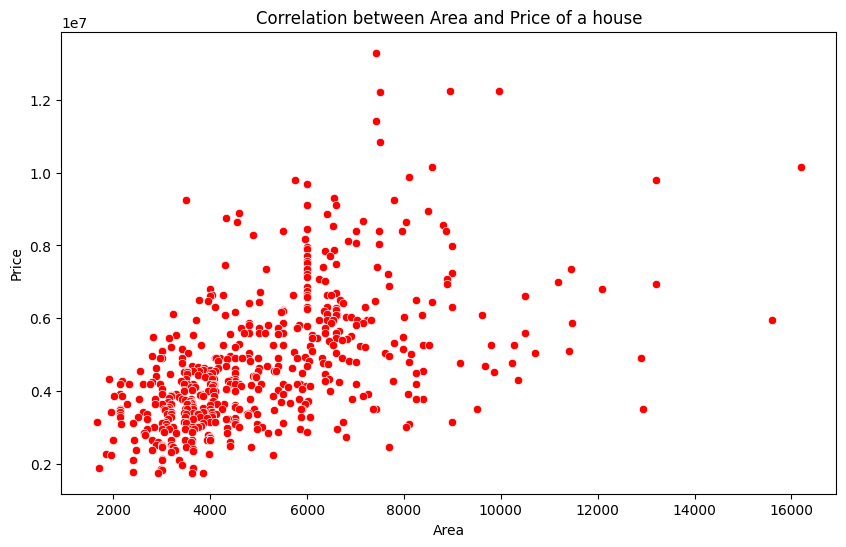

In [17]:
## graphical representations of the correlation between Price and Area
plt.figure(figsize=(10, 6))

sns.scatterplot(data=df, x='area', y='price', color='red')
plt.title('Correlation between Area and Price of a house')
plt.xlabel('Area')
plt.ylabel('Price')
plt.show()

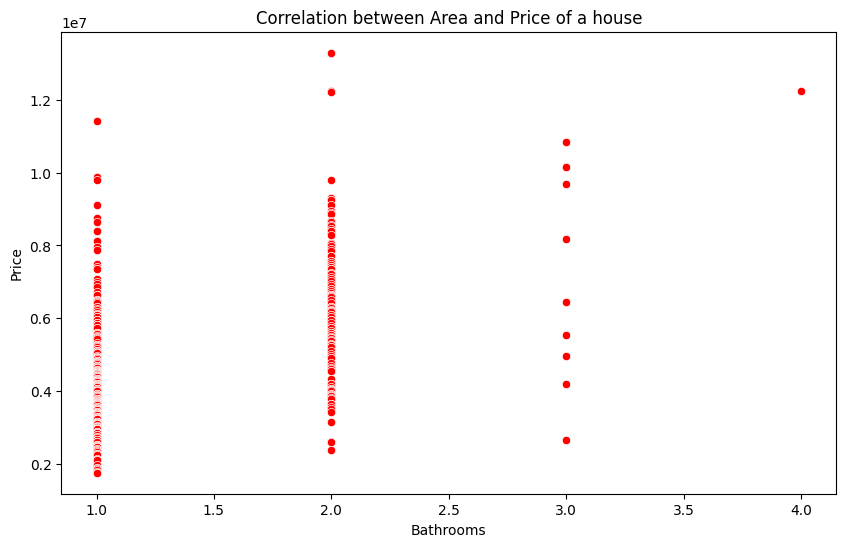

In [18]:
## graphical representations of the correlation between Price and Bathrooms

plt.figure(figsize=(10, 6))

sns.scatterplot(data=df, x='bathrooms', y='price', color='red')
plt.title('Correlation between Area and Price of a house')
plt.xlabel('Bathrooms')
plt.ylabel('Price')
plt.show()

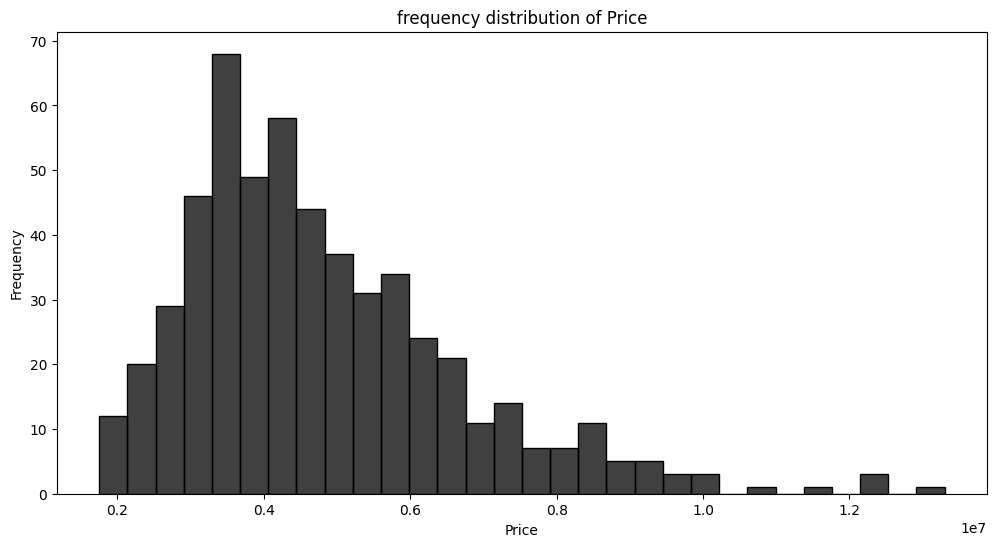

In [19]:
plt.figure(figsize=(12, 6))

sns.histplot(df['price'], color='black', bins=30)
plt.title('frequency distribution of Price')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

In [20]:
## Normalizing the fregquency distribution of price
log_price = np.log1p(df['price'])

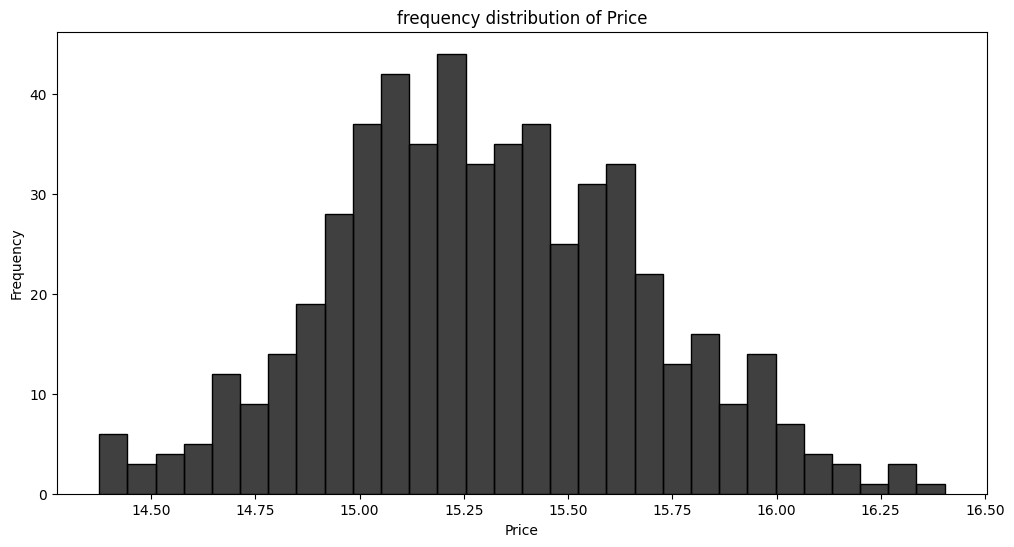

In [21]:
## graphical representation of the transformed price
plt.figure(figsize=(12, 6))

sns.histplot(log_price, color='black', bins=30)
plt.title('frequency distribution of Price')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

## Building a validation framework
1. Training dataset 60%
2. Validation dataset 20%
3. Testing dataset 20%

In [22]:
## Dividing the dataset into training, validating and testing dataset
df_train_valid, df_test = train_test_split(df, test_size=0.2 , random_state=20)
df_train, df_valid = train_test_split(df_train_valid, test_size=0.25, random_state=20) 

print(f'Size of Training Dataset {len(df_train)}')
print(f'Size of Validation Dataset {len(df_valid)}')
print(f'Size of Testing Dataset {len(df_test)}')

Size of Training Dataset 327
Size of Validation Dataset 109
Size of Testing Dataset 109


In [23]:
# Data preparation for the machine learning
y_train = df_train['price']
y_valid = df_valid['price']

In [24]:
del df_train['price']
del df_valid['price']

In [25]:
## transforming the target variable
y_train = np.log1p(y_train).values
y_valid = np.log1p(y_valid ).values

In [26]:
### selecting only int and float from the features for the training and validation
df_train_numb_only = df_train.select_dtypes(include=['int', 'float'])
df_valid_numb_only = df_valid.select_dtypes(include=['int', 'float'])

## Training the baseline models

# linear regression model 

In [27]:
## creating an instance for the linear regression model 
l_model = LinearRegression()
l_model.fit(df_train_numb_only,y_train)

## Evaluating the linear regression model
y_valid_predict = l_model.predict(df_valid_numb_only)

l_model_rmse = root_mean_squared_error(y_valid, y_valid_predict) 

print(f'Baseline Validation Metric {round(l_model_rmse, 2) * 100} %')


Baseline Validation Metric 26.0 %


# DecisionTreeRegressor model

In [28]:
## creating an instance for a DecisionTreeRegressor model 
tree_model = DecisionTreeRegressor()
tree_model.fit(df_train_numb_only,y_train)

## Evaluating the linear regression model
y_valid_predict = tree_model.predict(df_valid_numb_only)

tree_model_rmse = root_mean_squared_error(y_valid, y_valid_predict) 
print(f'Baseline Validation Metric {round(tree_model_rmse, 2) * 100} %')


Baseline Validation Metric 35.0 %


 ## RandomForestRegressor model

In [29]:
## creating an instance for a DecisionTreeRegressor model 
rf_model = RandomForestRegressor()
rf_model.fit(df_train_numb_only,y_train)

## Evaluating the linear regression model
y_valid_predict = rf_model.predict(df_valid_numb_only)

rf_model_rmse = root_mean_squared_error(y_valid, y_valid_predict) 
print(f'Baseline Validation Metric {round(rf_model_rmse, 2) * 100} %')


Baseline Validation Metric 28.000000000000004 %


## AdaBoostRegressor model

In [30]:
## creating an instance for a DecisionTreeRegressor model 
ab_model = AdaBoostRegressor()
ab_model.fit(df_train_numb_only,y_train)

## Evaluating the linear regression model
y_valid_predict = ab_model.predict(df_valid_numb_only)

ab_model_rmse = root_mean_squared_error(y_valid, y_valid_predict) 
print(f'Baseline Validation Metric {round(ab_model_rmse, 2) * 100} %')


Baseline Validation Metric 27.0 %


## GradientBoostingRegressor model 

In [31]:
## creating an instance for a GradientBoostingRegressor model 
gb_model = GradientBoostingRegressor()
gb_model.fit(df_train_numb_only,y_train)

## Evaluating the linear regression model
y_valid_predict = gb_model.predict(df_valid_numb_only)

gb_model_rmse = root_mean_squared_error(y_valid, y_valid_predict) 
print(f'Baseline Validation Metric {round(gb_model_rmse, 2) * 100} %')


Baseline Validation Metric 28.999999999999996 %


## BaggingRegressor model 

In [32]:
## creating an instance for a BaggingRegressor model 
br_model = GradientBoostingRegressor()
br_model.fit(df_train_numb_only,y_train)

## Evaluating the linear regression model
y_valid_predict = br_model.predict(df_valid_numb_only)

br_model_rmse = root_mean_squared_error(y_valid, y_valid_predict) 
print(f'Baseline Validation Metric {round(br_model_rmse, 2) * 100} %')


Baseline Validation Metric 28.999999999999996 %


## XGBRegressor model

In [33]:
## creating an instance for a XGBRegressor model 
xgb_model = GradientBoostingRegressor()
xgb_model.fit(df_train_numb_only,y_train)

## Evaluating the linear regression model
y_valid_predict = xgb_model.predict(df_valid_numb_only)

xgb_model_rmse = root_mean_squared_error(y_valid, y_valid_predict) 
print(f'Baseline Validation Metric {round(xgb_model_rmse, 2) * 100} %')


Baseline Validation Metric 28.999999999999996 %


## Feature engineering on the dataset for the training and validation

In [34]:
## Feature engineering on the dataset for the training and validation
df_train_include_cat = df_train.select_dtypes(include=['int', 'float', 'category'])
df_valid_include_cat = df_valid.select_dtypes(include=['int', 'float', 'category'])

In [35]:
# converting to dictionary
df_train_include_cat_dict = df_train_include_cat.to_dict(orient='records')
df_valid_include_cat_dict = df_valid_include_cat.to_dict(orient='records')

In [36]:
## feature encoding 
dv = DictVectorizer(sparse=False) 

dv.fit(df_train_include_cat_dict) 

## transforming 
X_train = dv.transform(df_train_include_cat_dict) 
X_valid = dv.transform(df_valid_include_cat_dict) 
X_train

array([[0.00e+00, 1.00e+00, 6.00e+03, ..., 1.00e+00, 0.00e+00, 4.00e+00],
       [1.00e+00, 0.00e+00, 3.75e+03, ..., 1.00e+00, 0.00e+00, 1.00e+00],
       [0.00e+00, 1.00e+00, 6.00e+03, ..., 1.00e+00, 0.00e+00, 4.00e+00],
       ...,
       [1.00e+00, 0.00e+00, 6.05e+03, ..., 0.00e+00, 1.00e+00, 1.00e+00],
       [0.00e+00, 1.00e+00, 6.55e+03, ..., 0.00e+00, 1.00e+00, 2.00e+00],
       [0.00e+00, 1.00e+00, 5.72e+03, ..., 0.00e+00, 1.00e+00, 2.00e+00]])

## Training the baseline models

# linear regression model

In [37]:
## creating an instance for the linear regression model 
l_model_2 = LinearRegression()
l_model_2.fit(X_train,y_train)

## Evaluating the linear regression model
y_valid_predict = l_model_2.predict(X_valid)

l_model_2_rmse = root_mean_squared_error(y_valid, y_valid_predict) 

print(f'Baseline Validation Metric {round(l_model_2_rmse, 2) * 100} %')


Baseline Validation Metric 21.0 %


# DecisionTreeRegressor model

In [38]:
## creating an instance for the DecisionTreeRegressor model 
tree_model_2 = DecisionTreeRegressor()
tree_model_2.fit(X_train,y_train)

## Evaluating the linear regression model
y_valid_predict = tree_model_2.predict(X_valid)

tree_model_2_rmse = root_mean_squared_error(y_valid, y_valid_predict) 

print(f'Baseline Validation Metric {round(tree_model_2_rmse, 2) * 100} %')


Baseline Validation Metric 30.0 %


# RandomForestRegressor model

In [39]:
## creating an instance for the RandomForestRegressor model 
rf_model_2 = RandomForestRegressor()
rf_model_2.fit(X_train,y_train)

## Evaluating the linear regression model
y_valid_predict = rf_model_2.predict(X_valid)

rf_model_2_rmse = root_mean_squared_error(y_valid, y_valid_predict) 

print(f'Baseline Validation Metric {round(rf_model_2_rmse, 2) * 100} %')


Baseline Validation Metric 22.0 %


# AdaBoostRegressor model

In [40]:
## creating an instance for the AdaBoostRegressor model 
ad_model_2 = AdaBoostRegressor()
ad_model_2.fit(X_train,y_train)

## Evaluating the linear regression model
y_valid_predict = ad_model_2.predict(X_valid)

ad_model_2_rmse = root_mean_squared_error(y_valid, y_valid_predict) 

print(f'Baseline Validation Metric {round(ad_model_2_rmse, 2) * 100} %')


Baseline Validation Metric 24.0 %


## GradientBoostingRegressor model

In [41]:
## creating an instance for the GradientBoostingRegressor model 
gb_model_2 = GradientBoostingRegressor()
gb_model_2.fit(X_train,y_train)

## Evaluating the linear regression model
y_valid_predict = gb_model_2.predict(X_valid)

gb_model_2_rmse = root_mean_squared_error(y_valid, y_valid_predict) 

print(f'Baseline Validation Metric {round(gb_model_2_rmse, 2) * 100} %')


Baseline Validation Metric 23.0 %


## BaggingRegressor model 

In [42]:
## creating an instance for the BaggingRegressor model 
br_model_2 = BaggingRegressor()
br_model_2.fit(X_train,y_train)

## Evaluating the linear regression model
y_valid_predict = br_model_2.predict(X_valid)

br_model_2_rmse = root_mean_squared_error(y_valid, y_valid_predict) 

print(f'Baseline Validation Metric {round(br_model_2_rmse, 2) * 100} %')


Baseline Validation Metric 24.0 %


# XGBRegressor model

In [43]:
## creating an instance for the XGBRegressor model 
xgb_model_2 = XGBRegressor()
xgb_model_2.fit(X_train,y_train)

## Evaluating the linear regression model
y_valid_predict = xgb_model_2.predict(X_valid)

xgb_model_2_rmse = root_mean_squared_error(y_valid, y_valid_predict) 

print(f'Baseline Validation Metric {round(xgb_model_2_rmse, 2) * 100} %')


Baseline Validation Metric 25.0 %


## Training and Testing Final Model

In [44]:
## taking the target variable out of the dataset
y_train_fm = df_train_valid['price']
y_test_fm = df_test['price']


del df_train_valid['price']
del df_test['price']


## normalizing the target variable
y_train_fm = np.log1p(y_train_fm).values
y_test_fm = np.log1p(y_test_fm).values

In [46]:
## converting the features to dictionary
df_train_valid_todict = df_train_valid.to_dict(orient='records')
df_test_todict = df_test.to_dict(orient='records')

In [47]:
## feature encoding the categorical features
dv = DictVectorizer(sparse=False) 

dv.fit(df_train_valid_todict) 

## transforming 
X_train_fm = dv.transform(df_train_valid_todict) 
X_test_fm = dv.transform(df_test_todict) 
X_train_fm

array([[0.000e+00, 1.000e+00, 4.280e+03, ..., 1.000e+00, 0.000e+00,
        1.000e+00],
       [1.000e+00, 0.000e+00, 4.500e+03, ..., 1.000e+00, 0.000e+00,
        1.000e+00],
       [1.000e+00, 0.000e+00, 3.970e+03, ..., 1.000e+00, 0.000e+00,
        1.000e+00],
       ...,
       [1.000e+00, 0.000e+00, 1.905e+03, ..., 1.000e+00, 0.000e+00,
        2.000e+00],
       [1.000e+00, 0.000e+00, 4.352e+03, ..., 1.000e+00, 0.000e+00,
        2.000e+00],
       [1.000e+00, 0.000e+00, 8.250e+03, ..., 1.000e+00, 0.000e+00,
        1.000e+00]])

In [49]:
## Testing the final linear regression model (l_model_2)
## creating an instance for the linear regression model 
l_model_2 = LinearRegression()
l_model_2.fit(X_train_fm,y_train_fm)

## Evaluating the linear regression model
y_test_predict = l_model_2.predict(X_test_fm)

l_model_2_rmse = root_mean_squared_error(y_test_fm, y_test_predict) 

print(f'Baseline Validation Metric {round(l_model_2_rmse, 2) * 100} %')


Baseline Validation Metric 21.0 %


## Saving the final model

In [51]:
import pickle 

with open('house_price_prediction.bin', 'wb') as f_out: 
    pickle.dump((dv, l_model_2), f_out)